https://github.com/aws/amazon-sagemaker-examples/tree/main/sagemaker-python-sdk/pytorch_cnn_cifar10

In [1]:
pwd

'/home/ec2-user/SageMaker/teledermatologyAI_capstone'

In [2]:
cd aws_cifar_example

/home/ec2-user/SageMaker/teledermatologyAI_capstone/aws_cifar_example


In [3]:
!/bin/bash ./setup.sh

The user has root access.
nvidia-docker2 already installed. We are good to go!
SageMaker instance route table setup is ok. We are good to go.
SageMaker instance routing for Docker is ok. We are good to go!


In [4]:
import sagemaker

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix= "sagemaker/DEMO-pytorch-cnn-cifar10"

role = sagemaker.get_execution_role()

In [5]:
import os
import subprocess

instance_type = "local"

try:
    if subprocess.call("nvidia-smi") == 0:
        ## Set type to GPU if one is present
        instance_type = "local_gpu"
except:
    pass

print("Instance type = " + instance_type)

Thu Oct 13 03:53:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   38C    P0    32W /  70W |   7723MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

from utils_cifar import get_train_data_loader, get_test_data_loader, imshow, classes

trainloader = get_train_data_loader()
testloader = get_test_data_loader()

Files already downloaded and verified
Files already downloaded and verified


    truck     truck      frog       car


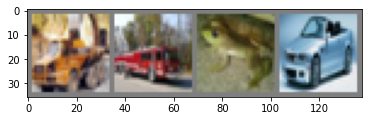

In [7]:
import numpy as np
import torchvision, torch

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(" ".join("%9s" % classes[labels[j]] for j in range(4)))

In [8]:
inputs = sagemaker_session.upload_data(path="data", bucket=bucket, key_prefix="data/cifar10")

In [9]:
bucket

'sagemaker-ca-central-1-226660257357'

In [10]:
!pygmentize source/cifar10.py

import argparse
import logging
import os

import torch
import torch.distributed as dist
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.parallel
import torch.optim
import torch.utils.data
import torch.utils.data.distributed
import torchvision
import torchvision.models
import torchvision.transforms as transforms

try:
    from sagemaker_inference import environment
except:
    from sagemaker_training import environment

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")


# https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py#L118
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        s

In [11]:
from sagemaker.pytorch import PyTorch

cifar10_estimator = PyTorch(
    entry_point="source/cifar10.py",
    role=role,
    framework_version="1.7.1",
    py_version="py3",
    instance_count=1,
    instance_type=instance_type,
)

cifar10_estimator.fit(inputs)

Creating gxmqw41ev2-algo-1-d7qdk ... 
Creating gxmqw41ev2-algo-1-d7qdk ... done
Attaching to gxmqw41ev2-algo-1-d7qdk
gxmqw41ev2-algo-1-d7qdk | 2022-10-13 03:53:35,210 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
gxmqw41ev2-algo-1-d7qdk | 2022-10-13 03:53:35,253 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
gxmqw41ev2-algo-1-d7qdk | 2022-10-13 03:53:35,265 sagemaker_pytorch_container.training INFO     Invoking user training script.
gxmqw41ev2-algo-1-d7qdk | 2022-10-13 03:53:35,644 sagemaker-training-toolkit INFO     Invoking user script
gxmqw41ev2-algo-1-d7qdk | 
gxmqw41ev2-algo-1-d7qdk | Training Env:
gxmqw41ev2-algo-1-d7qdk | 
gxmqw41ev2-algo-1-d7qdk | {
gxmqw41ev2-algo-1-d7qdk |     "additional_framework_parameters": {},
gxmqw41ev2-algo-1-d7qdk |     "channel_input_dirs": {
gxmqw41ev2-algo-1-d7qdk |         "training": "/opt/ml/input/data/training"
gxmqw41ev2-algo-1-d7qdk |     },
gxmqw41ev2-algo

In [12]:
from sagemaker.pytorch import PyTorchModel

cifar10_predictor = cifar10_estimator.deploy(initial_instance_count=1, instance_type=instance_type)

Attaching to m1ilktujt2-algo-1-ti6s4
m1ilktujt2-algo-1-ti6s4 | ['torchserve', '--start', '--model-store', '/.sagemaker/ts/models', '--ts-config', '/etc/sagemaker-ts.properties', '--log-config', '/opt/conda/lib/python3.6/site-packages/sagemaker_pytorch_serving_container/etc/log4j.properties', '--models', 'model.mar']
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:56:45,126 [INFO ] main org.pytorch.serve.ModelServer - 
m1ilktujt2-algo-1-ti6s4 | Torchserve version: 0.3.1
m1ilktujt2-algo-1-ti6s4 | TS Home: /opt/conda/lib/python3.6/site-packages
m1ilktujt2-algo-1-ti6s4 | Current directory: /
m1ilktujt2-algo-1-ti6s4 | Temp directory: /home/model-server/tmp
m1ilktujt2-algo-1-ti6s4 | Number of GPUs: 1
m1ilktujt2-algo-1-ti6s4 | Number of CPUs: 16
m1ilktujt2-algo-1-ti6s4 | Max heap size: 15880 M
m1ilktujt2-algo-1-ti6s4 | Python executable: /opt/conda/bin/python3.6
m1ilktujt2-algo-1-ti6s4 | Config file: /etc/sagemaker-ts.properties
m1ilktujt2-algo-1-ti6s4 | Inference address: http://0.0.0.0:8080
m1ilktu

GroundTruth:   cat ship ship plane
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:56:52,191 [INFO ] W-9000-model_1-stdout MODEL_METRICS - PredictionTime.Milliseconds:2526.51|#ModelName:model,Level:Model|#hostname:735d887cc00c,requestID:9d51d63d-49ee-47f4-958e-e526f7473215,timestamp:1665633412
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:56:52,197 [INFO ] W-9000-model_1 org.pytorch.serve.wlm.WorkerThread - Backend response time: 2535
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:56:52,197 [INFO ] W-9000-model_1 ACCESS_LOG - /172.18.0.1:44510 "POST /invocations HTTP/1.1" 200 2546
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:56:52,199 [INFO ] W-9000-model_1 TS_METRICS - Requests2XX.Count:1|#Level:Host|#hostname:735d887cc00c,timestamp:null
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:56:52,200 [INFO ] W-9000-model_1 TS_METRICS - QueueTime.ms:0|#Level:Host|#hostname:735d887cc00c,timestamp:null
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:56:52,200 [INFO ] W-9000-model_1 TS_METRICS - WorkerThreadTime.ms:7|#Level:Host|#hostn

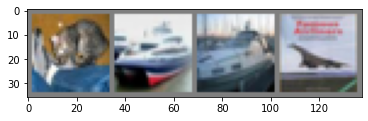

m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:57:46,280 [INFO ] pool-2-thread-1 TS_METRICS - CPUUtilization.Percent:0.0|#Level:Host|#hostname:735d887cc00c,timestamp:1665633466
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:57:46,280 [INFO ] pool-2-thread-1 TS_METRICS - DiskAvailable.Gigabytes:33.411251068115234|#Level:Host|#hostname:735d887cc00c,timestamp:1665633466
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:57:46,280 [INFO ] pool-2-thread-1 TS_METRICS - DiskUsage.Gigabytes:106.57701110839844|#Level:Host|#hostname:735d887cc00c,timestamp:1665633466
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:57:46,281 [INFO ] pool-2-thread-1 TS_METRICS - DiskUtilization.Percent:76.1|#Level:Host|#hostname:735d887cc00c,timestamp:1665633466
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:57:46,281 [INFO ] pool-2-thread-1 TS_METRICS - MemoryAvailable.Megabytes:49042.41796875|#Level:Host|#hostname:735d887cc00c,timestamp:1665633466
m1ilktujt2-algo-1-ti6s4 | 2022-10-13 03:57:46,281 [INFO ] pool-2-thread-1 TS_METRICS - MemoryUsed.Megabyte

In [13]:
# get some test images
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join("%4s" % classes[labels[j]] for j in range(4)))

outputs = cifar10_predictor.predict(images.numpy())

_, predicted = torch.max(torch.from_numpy(np.array(outputs)), 1)

print("Predicted: ", " ".join("%4s" % classes[predicted[j]] for j in range(4)))

In [14]:
cifar10_predictor.delete_endpoint()

Gracefully stopping... (press Ctrl+C again to force)


In [ ]:
timestamp:1665633526